## Linear Interpolation 
#### between two points 
$$y = y_1 + \frac{y_2 - y_1}{x_2 - x_1}(x - x_1 )$$

In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = np.loadtxt('data.txt', skiprows = 1 )
l = data[: , 0] # wavelength 
r = data[: , 1] # refractive index 
print( f' l = {l} \n and \n r = {r}')

 l = [ 3511.  3638.  4047.  4358.  4416.  4579.  4658.  4727.  4765.  4800.
  4861.  4880.  4965.  5017.  5145.  5320.  5461.  5876.  5893.  6328.
  6438.  6563.  6943.  8210.  8300.  8521.  9040. 10140. 10600. 13000.
 15000. 15500. 19701. 23254.] 
 and 
 r = [1.53894 1.53648 1.53024 1.52669 1.52611 1.52462 1.52395 1.52339 1.5231
 1.52283 1.52238 1.52224 1.52165 1.5213  1.52049 1.51947 1.51872 1.5168
 1.51673 1.51509 1.51472 1.51432 1.51322 1.51037 1.51021 1.50981 1.50894
 1.50731 1.50669 1.50371 1.5013  1.50068 1.495   1.48929]


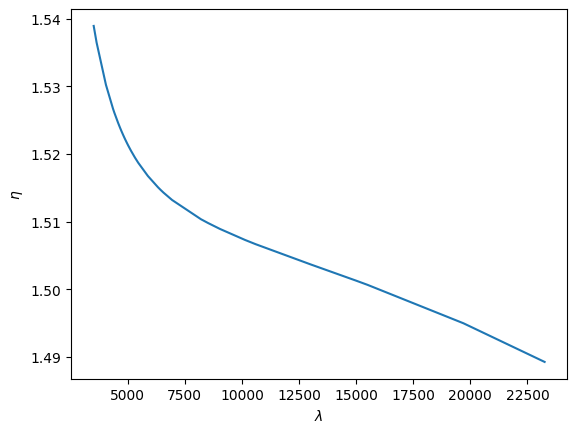

In [3]:
# plt.figure( figsize = ( 17   , 8 ))
plt.plot( l , r )
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\eta$')
plt.show()

In [4]:
print( 'Shortes wavelength in the data = ' , np.min( l ))
print( 'Longest wavelength in the data = ' , np.max( l ))

Shortes wavelength in the data =  3511.0
Longest wavelength in the data =  23254.0


In [5]:
def linear_interpolate_vector( l , r , n ): # n = number of points 
    l_li = np.linspace( l[0] , l[-1] , n )
    r_li = np.zeros( l_li.size )
    for i in range( l_li.size ): 
        index = np.sum( np.array( l < l_li[i] , dtype = int )) - 1
        r_li[i] = r[index] + ( r[index + 1] - r[index] )*( l_li[i] - l[index])/( l[index + 1] - l[index] )
    return l_li , r_li  # wavelenght and refractive index 

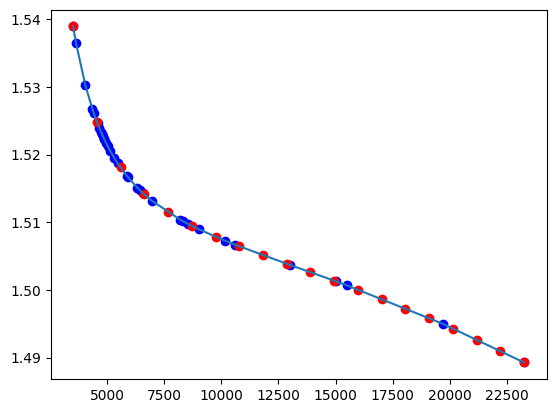

In [6]:
lnew , rnew = linear_interpolate_vector( l , r, 20  )
plt.plot( l , r )
plt.scatter( l , r , color = 'b')
plt.scatter( lnew , rnew , color = 'r')
plt.show()

### Question 2 

$$ p_L(x) = \sum\limits_{k = 0}^n y_k L_k(x) $$
$$L_k(x) = \prod\limits_{i \neq k }^n \frac{x - x_i}{x_k - x_i}$$

In [7]:
def L( x , k , xp ):
    xk = xp[k]
    temp = np.delete( xp , k)
    return np.prod(np.divide( x - temp , xk - temp ))
# L = np.vectorize(L)
def P( x , xp , yp ): 
    ans = 0.0 
    for k in range( xp.size ): 
        ans += yp[k]*L( x , k , xp )
    return ans 
def interpol( x , xp , yp ):
    y = np.zeros( x.size )
    for i in range( x.size ):
        y[i] = P( x[i] , xp , yp )
    return y 

In [8]:
# def L2( x , k , xp ):
#     xk = xp[k]
#     temp = np.delete( xp , k)
#     return np.prod(np.divide( x - temp , xk - temp ))
# L2 = np.vectorize(L2 , excluded=['x' , 'xp'])
# def P2( x , xp , yp ): 
#     ans = 0.0 
#     k = np.arange( xp.size )
#     l = L( x , k , xp )
#     return np.sum( yp*l )
# P2 = np.vectorize( P2 , excluded=['xp' , 'yp'])

In [9]:
def testP( xp , yp ): 
    result = np.zeros( xp.size )
    for i in range( xp.size ): 
        result[i] = P( xp[i] , xp , yp ) - yp[i]
    return result 
def testP2( xp , yp ): 
    return P( xp , xp , yp ) - yp 

In [10]:
x = np.linspace( 0 , np.pi , 5 )
print( 'size of x = '  , x.size )
y = np.sin( x )
print( testP( x , y ))

size of x =  5
[0. 0. 0. 0. 0.]


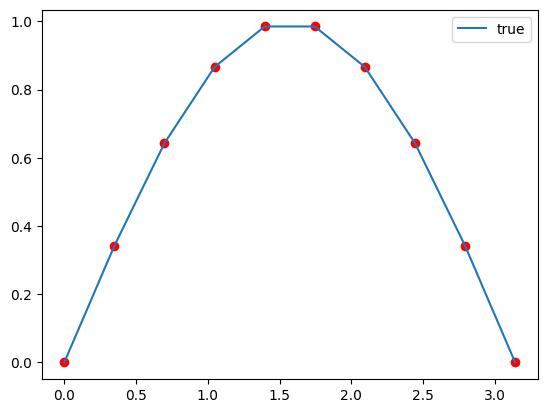

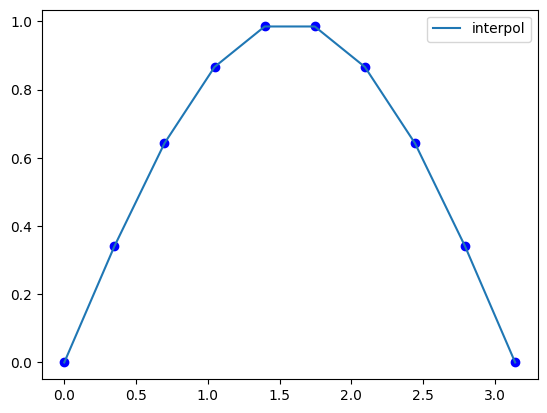

In [11]:
test_size = 10 
test_x = np.linspace( 0 , np.pi , test_size )
true_y = np.sin( test_x ) 
inter_y = interpol( test_x , x , y )

plt.plot( test_x , true_y , label = r'true')
plt.scatter( test_x , true_y , color = 'red')
plt.legend()
plt.show()

plt.plot( test_x , inter_y , label = 'interpol')
plt.scatter( test_x , inter_y , color = 'b')
plt.legend()
plt.show()

In [12]:
print( inter_y - true_y )

[ 0.00000000e+00 -1.63021667e-03 -2.43693689e-04  2.69526223e-04
  5.71903358e-05  5.71903358e-05  2.69526223e-04 -2.43693689e-04
 -1.63021667e-03  0.00000000e+00]


### test 

In [13]:
x = np.arange( 4 , 10 )
y = np.array( x < 6.5  , dtype = int  )
print( x )
print( y )
print( 'index = ' , np.sum( y ) - 1 )
for i in range( x.size ): 
    print( x[i])
    print( x )

[4 5 6 7 8 9]
[1 1 1 0 0 0]
index =  2
4
[4 5 6 7 8 9]
5
[4 5 6 7 8 9]
6
[4 5 6 7 8 9]
7
[4 5 6 7 8 9]
8
[4 5 6 7 8 9]
9
[4 5 6 7 8 9]


In [14]:
print( np.prod( x ))

60480


In [15]:
print( x )
y = np.delete( x , 1 )
print(  y )
print( x )

[4 5 6 7 8 9]
[4 6 7 8 9]
[4 5 6 7 8 9]


In [16]:
xp = [ 0 , 1 , 2 , 3 ]
xp = np.array( xp )

k = np.arange( 0 , xp.size  )

print( L( 2 ,  3 , xp ))
print( x )

0.0
[4 5 6 7 8 9]
